<a href="https://colab.research.google.com/github/Helyousfi/pytorch-full-course/blob/main/full_pytorch_course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Build a simple Neural Network :

#### Import libraries :

In [ ]:
import torch 
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets # Has standard datasets we can import in a nice and easy way
import torchvision.transforms as transforms # Transformations we can perform on our dataset

#### Load the dataset :

In [ ]:
batch_size = 64

# Load the training dataset
train_dataset = datasets.MNIST(
    root="dataset/",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

# Dataloader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

# Load the test dataset
test_dataset = datasets.MNIST(
    root="dataset/",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

# DataLoader
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

#### Build The Model:

In [ ]:
class NeuralNetwork(nn.Module):
  def __init__(self, input_size, num_classes):
    super(NeuralNetwork, self).__init__()
    self.fc1 = nn.Linear(input_size, 4096)
    self.fc2 = nn.Linear(4096, num_classes)
  def forward(self, x):
    x = self.fc1(x)
    x = self.fc2(x)
    return x

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 784 # 28x28 = 784, size of MNIST images (grayscale)
num_classes = 10
learning_rate = 0.001
num_epochs = 3

In [ ]:
model = NeuralNetwork(input_size, 10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

#### Train the model

In [ ]:
for epoch in range(num_epochs):
  print(f"Epoch : {epoch}")
  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to cuda if possible
    data = data.to(device)
    targets = targets.to(device)

    # Get to correct shape, 28x28->784
    # -1 will flatten all outer dimensions into one
    data = data.reshape(data.shape[0], -1) 

    predicted = model(data)
    loss = criterion(predicted, targets)
    

    # zero previous gradients
    optimizer.zero_grad()
        
    # back-propagation
    loss.backward()

    # gradient descent or adam step
    optimizer.step()
  print(loss)
    


Epoch : 0
tensor(0.5242, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch : 1
tensor(0.0877, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch : 2
tensor(0.2711, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
model.eval()

NeuralNetwork(
  (fc1): Linear(in_features=784, out_features=4096, bias=True)
  (fc2): Linear(in_features=4096, out_features=10, bias=True)
)

In [ ]:
def check_accuracy(model, loader):

  if loader.dataset.train:
    print("Training data")
  else:
    print("Testing data")
  corrects = 0
  samples = 0
  with torch.no_grad():
      for data, target in loader:
        data = data.to(device)
        target = target.to(device)
        
        predicted = model(data.reshape(data.shape[0], -1)).to(device)
        _, predicted = predicted.max(1)

        for i in range(len(predicted)):
          if predicted[i] == target[i]:
            corrects = corrects + 1
          samples = samples + 1
      print(f"Got {corrects} corrects / {samples} samples with accuracy {corrects / samples}")
  return corrects / samples
        
check_accuracy(model, train_loader)
check_accuracy(model, train_loader)

Training data
Got 54452 corrects / 60000 samples with accuracy 0.9075333333333333
Training data
Got 54452 corrects / 60000 samples with accuracy 0.9075333333333333


0.9075333333333333

## Build a CNN : Convolutional Neural Network

#### Some Imports : 

In [ ]:
import torch 
import torch.nn as nn # All neural network modules, nn.Linear, nn.Conv2d, BatchNorm, Loss functions
import torch.optim as optim # For all Optimization algorithms, SGD, Adam, etc.
import torch.nn.functional as F # All functions that don't have any parameters
from torch.utils.data import DataLoader # Gives easier dataset managment and creates mini batches
import torchvision.datasets as datasets # Has standard datasets we can import in a nice and easy way
import torchvision.transforms as transforms # Transformations we can perform on our dataset

#### Load the dataset:

In [ ]:
batch_size = 64

# Load the training dataset
train_dataset = datasets.MNIST(
    root="dataset/",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

# Dataloader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

# Load the test dataset
test_dataset = datasets.MNIST(
    root="dataset/",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

# DataLoader
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

#### Build the model:

In [ ]:
class CNN_model(nn.Module):
  def __init__(self, in_channels=1, num_classes=10):
    super(CNN_model, self).__init__()
    self.Conv1 = nn.Conv2d(in_channels=1, out_channels=8, kernel_size=(3,3), stride=2, padding=1)
    self.MaxPool = nn.MaxPool2d(kernel_size=(2,2), stride=(2,2))
    self.Conv2 = nn.Conv2d(in_channels=8, out_channels=16, kernel_size=(3,3), stride=1, padding=1)
    self.fc1 = nn.Linear(16 * 7 * 7, num_classes)

  def forward(self, x):
    x = F.relu(self.Conv1(x))
    x = self.MaxPool(x)
    x = F.relu(self.Conv2(x))
    x = x.reshape(x.shape[0], -1)
    x = self.fc1(x) 
    return x

def test():
  model = CNN_model(in_channels=1, num_classes=10)
  input = torch.rand(1, 1, 28, 28)
  out = model(input)
  print(out) 

test()

tensor([[ 0.0191, -0.0080, -0.0558, -0.0045, -0.0122, -0.0333,  0.0698, -0.0256,
         -0.0025,  0.0192]], grad_fn=<AddmmBackward0>)


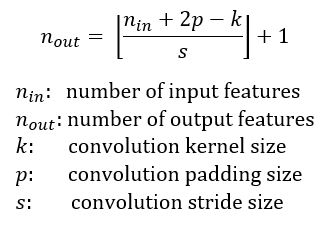

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = 784 # 28x28 = 784, size of MNIST images (grayscale)
in_channels = 1
num_classes = 10
learning_rate = 0.001
num_epochs = 3
load_model = False

In [ ]:
model = CNN_model(in_channels, num_classes=num_classes).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [ ]:
model.eval()

CNN_model(
  (Conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
  (MaxPool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (Conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)

#### Train the Model

##### Save and Load a model :

In [ ]:
def save_checkpoints(checkpoint, filename="model.pth.tar"):
  print("------------Saving the checkpoints------------")
  torch.save(checkpoint, filename)
def load_checkpoints(checkpoint):
  print("------------Loading the checkpoints------------")
  model.load_state_dict(checkpoint['state_dict'])
  optimizer.load_state_dict(checkpoint['optimizer'])

if load_model:
  model = CNN_model().to(device)
  checkpoint = torch.load("model.pth.tar")
  load_checkpoints(checkpoint)
  print(model)

##### Train the model

In [ ]:
for epoch in range(num_epochs):
  print(f"Epoch : {epoch}")
  losses = []

  if epoch % 1 == 0:
    checkpoint = {'state_dict' : model.state_dict(), 'optimizer' : optimizer.state_dict()}
    save_checkpoints(checkpoint)

  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to cuda if possible
    data = data.to(device)
    targets = targets.to(device)
    # Get to correct shape, 28x28->784
    # -1 will flatten all outer dimensions into one
    #data = data.reshape(data.shape[0], -1) 
    predicted = model(data)
    loss = criterion(predicted, targets)
    # zero previous gradients
    optimizer.zero_grad()
    # back-propagation
    loss.backward()
    # gradient descent or adam step
    optimizer.step()

    losses.append(loss.item())
  print(loss)

Epoch : 0
------------Saving the checkpoints------------
tensor(0.0299, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch : 1
------------Saving the checkpoints------------
tensor(0.0269, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch : 2
------------Saving the checkpoints------------
tensor(0.1933, device='cuda:0', grad_fn=<NllLossBackward0>)


In [ ]:
def check_accuracy(model, loader):

  if loader.dataset.train:
    print("Training data : ")
  else:
    print("Testing data : ")
  corrects = 0
  samples = 0
  with torch.no_grad():
      for data, target in loader:
        data = data.to(device)
        target = target.to(device)
        
        predicted = model(data).to(device)
        _, predicted = predicted.max(1)

        for i in range(len(predicted)):
          if predicted[i] == target[i]:
            corrects = corrects + 1
          samples = samples + 1
      print(f"Got {corrects} corrects / {samples} samples with accuracy {corrects / samples}")
  return corrects / samples
        
check_accuracy(model, train_loader)
check_accuracy(model, train_loader)

Training data : 
Got 58849 corrects / 60000 samples with accuracy 0.9808166666666667
Training data : 
Got 58849 corrects / 60000 samples with accuracy 0.9808166666666667


0.9808166666666667

We observe that the convolutional layers increased the accuracy 

## Transfer Learning

In [21]:
import torch
import torch.nn as nn 
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [6]:
model = torchvision.models.vgg16(pretrained=True)
print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [17]:
class Identity(nn.Module):
  def __init__(self):
    super(Identity, self).__init__()
  def forward(self, x):
    return x

for param in model.parameters():
  param.requires_grad = False

model.avgpool = Identity()
model.classifier = nn.Linear(512, 10) # Cifar10 32x32 so 32/2**5 = 1 
model.to(device)

print(model)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [18]:
batch_size = 64

# Load the training dataset
train_dataset = datasets.CIFAR10(
    root="dataset/",
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

# Dataloader
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=batch_size,
    shuffle=True,
)

# Load the test dataset
test_dataset = datasets.CIFAR10(
    root="dataset/",
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

# DataLoader
test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=batch_size,
    shuffle=False
)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
num_epochs = 3
criterion = nn.CrossEntropyLoss()
learning_rate = 1e-4

optimizer = optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(num_epochs):
  print(f"Epoch : {epoch}")

  for batch_idx, (data, targets) in enumerate(train_loader):
    # Get data to cuda if possible
    data = data.to(device)
    targets = targets.to(device)
    # Get to correct shape, 28x28->784
    # -1 will flatten all outer dimensions into one
    #data = data.reshape(data.shape[0], -1) 
    predicted = model(data)
    loss = criterion(predicted, targets)
    # zero previous gradients
    optimizer.zero_grad()
    # back-propagation
    loss.backward()
    # gradient descent or adam step
    optimizer.step()

  print(loss)

Epoch : 0
tensor(1.5860, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch : 1
tensor(1.2527, device='cuda:0', grad_fn=<NllLossBackward0>)
Epoch : 2
tensor(1.2932, device='cuda:0', grad_fn=<NllLossBackward0>)


In [24]:
def check_accuracy(model, loader):
  if loader.dataset.train:
    print("Training data : ")
  else:
    print("Testing data : ")
  corrects = 0
  samples = 0
  with torch.no_grad():
      for data, target in loader:
        data = data.to(device)
        target = target.to(device)
        
        predicted = model(data).to(device)
        _, predicted = predicted.max(1)

        for i in range(len(predicted)):
          if predicted[i] == target[i]:
            corrects = corrects + 1
          samples = samples + 1
      print(f"Got {corrects} corrects / {samples} samples with accuracy {corrects / samples}")
  return corrects / samples
        
check_accuracy(model, train_loader)
check_accuracy(model, test_loader)

Training data : 
Got 27783 corrects / 50000 samples with accuracy 0.55566
Training data : 
Got 27783 corrects / 50000 samples with accuracy 0.55566


0.55566